<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch03_04_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%8C%80%ED%91%9C%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.04. 기초통계 - 대표통계량
---
* 날짜:
* 이름:

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.randint(1, 100, 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

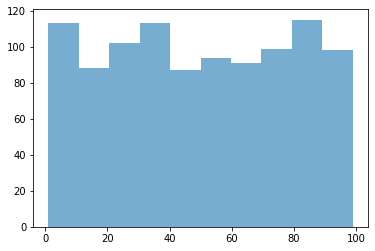

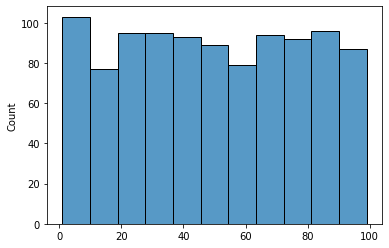

In [ ]:
plt.hist(a, alpha=.6)
plt.show()
sns.histplot(s)
plt.show()

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [ ]:
np.median(a), s.median()

(49.0, 49.0)

### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [ ]:
np.mean(a), s.mean()

(48.936, 48.936)

### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [ ]:
def harmonic(xs):
  n = len(xs)
  return n/np.sum(1/xs)

* 조화 평균 계산

In [ ]:
harmonic(a)

16.869083648783032

### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [ ]:
from scipy.stats import trim_mean
trim_mean(a, 0.1)

49.81125

## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.choice(['A', 'B', 'C'], 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

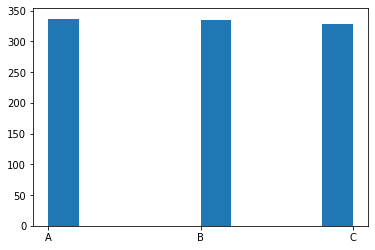

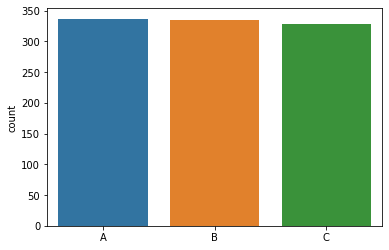

In [ ]:
plt.hist(a)
plt.show()
sns.countplot(x=a)
plt.show()

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [ ]:
s.value_counts()
val_most = s[0]
print(val_most)

A


* 사이파이 함수 `mode` 사용하기

In [ ]:
from scipy.stats import mode
mode(a)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

산술평균: 202.90177864180689 절사평균: 203.97044562356874


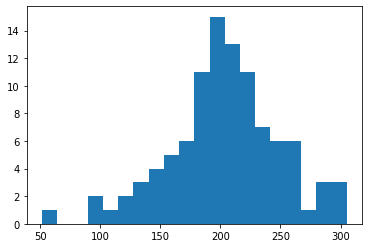

산술평균: 1190.991860041393 절사평균: 204.68981701614587


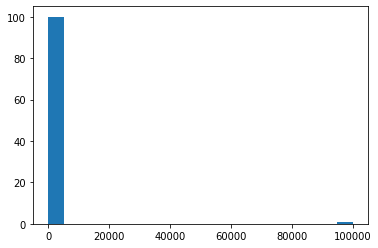

In [ ]:
income = np.random.normal(200, 50, 100) 
plt.hist(income, bins=20)
print('산술평균:',np.mean(income), '절사평균:',trim_mean(income, 0.1))
plt.show()
income = np.append(income, 100000)
plt.hist(income, bins=20)
print('산술평균:',np.mean(income), '절사평균:',trim_mean(income, 0.1))
plt.show()

#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.